<h1>Principal Components Analysis</h1>

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

In [276]:
def plot_single_indicator(df, indicator, label):
    val = 0
    plt.plot(df[indicator],np.zeros_like(df[indicator])+val, 'x', label=label)

def plot_indicator_pairs(df, indicator1, indicator2, label1, label2):
    plt.scatter(df[indicator1], df[indicator2], alpha=0.6, s=25,)
    plt.title(f"{label1} vs {label2}")
    plt.xlabel(label1)
    plt.ylabel(label2)
    indicator1avg = np.average(df[indicator1])
    indicator2avg = np.average(df[indicator2])
    plt.plot(indicator1avg, indicator2avg, 'rx')

def calculate_details(df, indicator1, indicator2, label1, label2):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[indicator1], df[indicator2])
    print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}")

    plt.scatter(df[indicator1], df[indicator2], alpha=0.6, s=25,)
    plt.title(f"{label1} vs {label2}")
    plt.xlabel(label1)
    plt.ylabel(label2)
    indicator1avg = np.average(df[indicator1])
    indicator2avg = np.average(df[indicator2])
    plt.plot(indicator1avg, indicator2avg, 'rx')
    plt.plot(df[indicator1], slope * df[indicator1] + intercept, color="red", label="Regression line")

def plot_pca(df):
    pca = PCA()
    pca.fit(df)
    pca_data = pca.transform(df)
    per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
    per_var
    print(pca_data)

    labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]
    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Components')
    plt.title('Scree Plot')
    plt.show()

    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.cumsum()) 

    labels = [f'PC{i+1}' for i in range(len(per_var))]

    pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)

    plt.scatter(pca_df["PC1"], pca_df["PC2"])
    plt.title("PCA graph")
    plt.xlabel(f'PC1 {per_var[0]}%')
    plt.ylabel(f'PC2 {per_var[1]}%')

    for sample in pca_df.index:
        plt.annotate(sample, (pca_df.loc[sample, "PC1"], pca_df.loc[sample, "PC2"]))

    plt.show()

    for i in range(len(pca.components_)):
        loading_scores = pd.Series(pca.components_[i], index=df.columns)
        sorted_loading = loading_scores.abs().sort_values(ascending=False)
        print(f"\n Top contributors to PC{i+1}:")
        print(sorted_loading)

<h2>Access Connectivity</h2>

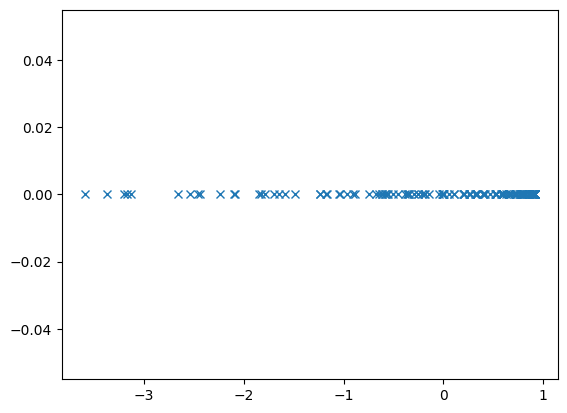

In [277]:
df = pd.read_csv("sub_indices/access_connectivity_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "Internet_Users", "Internet Users")

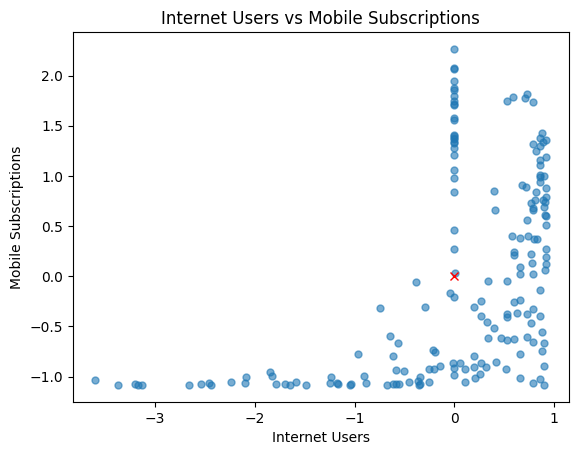

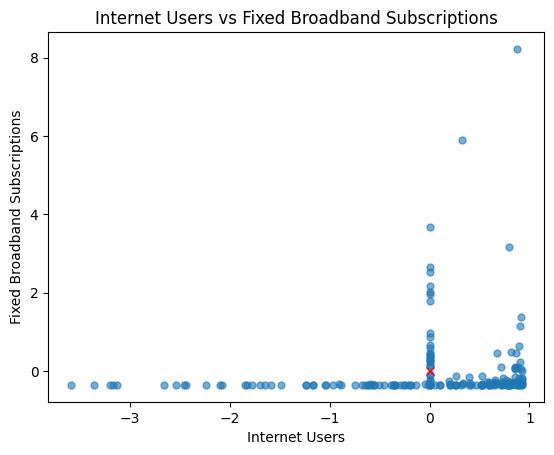

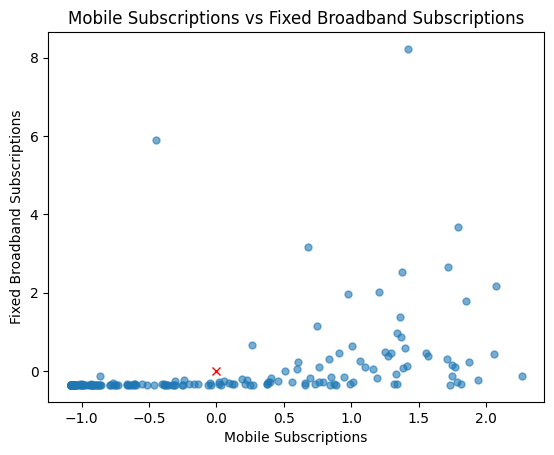

In [278]:
plot_indicator_pairs(df, "Internet_Users", "Mobile_Subscriptions", "Internet Users", "Mobile Subscriptions")
plt.show()
plot_indicator_pairs(df, "Internet_Users", "Fixed_Broadband_Subscriptions", "Internet Users", "Fixed Broadband Subscriptions")
plt.show()
plot_indicator_pairs(df, "Mobile_Subscriptions", "Fixed_Broadband_Subscriptions", "Mobile Subscriptions", "Fixed Broadband Subscriptions")
plt.show()

Slope: 0.47798994447776033, Intercept: 1.2952982271025363e-16, R-squared: 0.2284743870218523, P-value: 1.506933134174045e-11


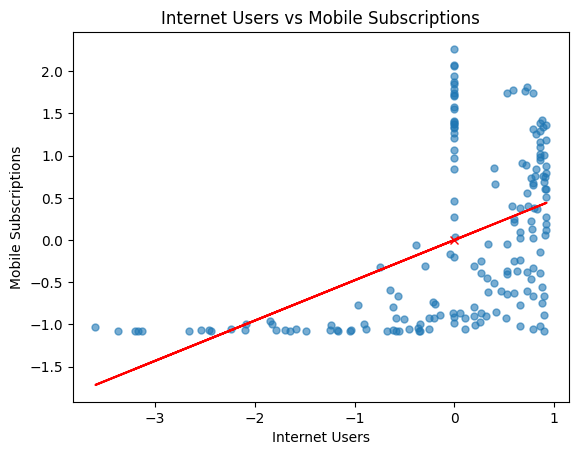

Slope: 0.13144588457611478, Intercept: 4.366676357096469e-17, R-squared: 0.017278020571997274, P-value: 0.08029999405897115


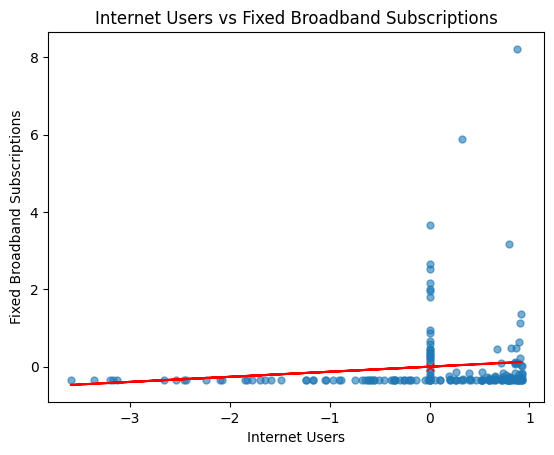

Slope: 0.39815762772532287, Intercept: -1.0697099364212942e-17, R-squared: 0.15852949651585674, P-value: 3.713833128384513e-08


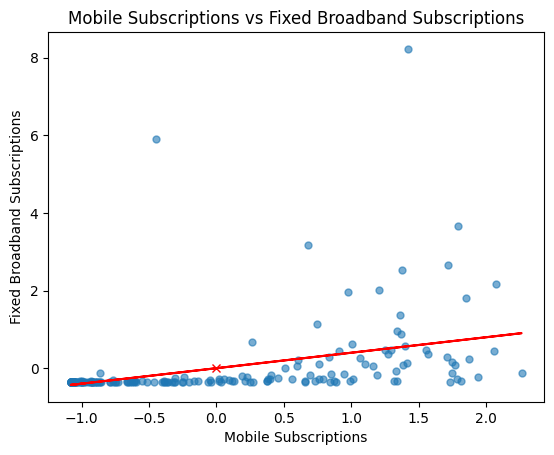

In [279]:
calculate_details(df, "Internet_Users", "Mobile_Subscriptions", "Internet Users", "Mobile Subscriptions")
plt.show()
calculate_details(df, "Internet_Users", "Fixed_Broadband_Subscriptions", "Internet Users", "Fixed Broadband Subscriptions")
plt.show()
calculate_details(df, "Mobile_Subscriptions", "Fixed_Broadband_Subscriptions", "Mobile Subscriptions", "Fixed Broadband Subscriptions")
plt.show()

[[-2.67811559e+00  1.79703092e+00  1.06518436e+00]
 [ 5.41737091e-01 -7.96283727e-01 -3.25569437e-02]
 [-5.42705361e-01 -7.35319574e-02  7.39041137e-02]
 [ 1.45191991e+00 -1.95029976e-01  1.73247411e+00]
 [-1.37519920e+00  3.30212090e-01 -1.67027802e-01]
 [ 4.63601307e-02 -7.90102089e-01 -6.13481563e-01]
 [ 6.44053652e-01 -6.91607052e-01  1.32712037e-01]
 [ 4.26019383e-01 -8.48437035e-01 -2.73479557e-01]
 [ 1.03790835e+00  2.38512513e-01  7.93924625e-01]
 [ 7.04915259e-01  1.93870498e-01  5.01710150e-01]
 [ 5.22514222e-01 -8.62089543e-01 -1.57526507e-01]
 [ 1.81010371e-01 -2.17016019e-01  4.42651429e-01]
 [ 3.21605678e-01 -7.09057761e-01 -3.02218293e-01]
 [-9.32199966e-01  1.65982544e-01  4.68168888e-02]
 [ 1.22690675e+00 -8.80164617e-01  6.53766893e-01]
 [ 1.22405332e+00 -7.64828860e-01  4.54325377e-01]
 [ 1.24799936e+00  5.31041421e-02  1.22950285e+00]
 [ 2.77739465e+00  4.36602524e+00 -2.86769867e+00]
 [-2.30630685e+00  1.37815180e+00  7.14143450e-01]
 [-1.33622664e+00  3.54209144e-

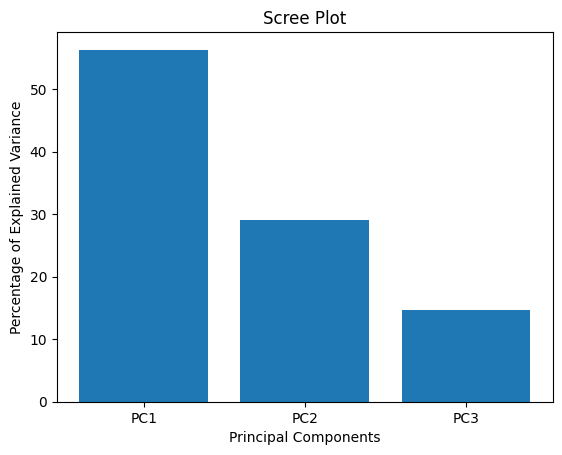

[0.56348873 0.29030825 0.14620301]
[0.56348873 0.85379699 1.        ]


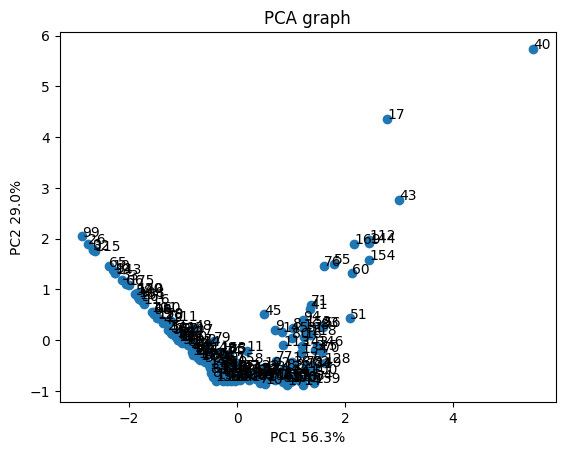


 Top contributors to PC1:
Mobile_Subscriptions             0.669212
Internet_Users                   0.556925
Fixed_Broadband_Subscriptions    0.491925
dtype: float64

 Top contributors to PC2:
Fixed_Broadband_Subscriptions    0.773199
Internet_Users                   0.632788
Mobile_Subscriptions             0.041751
dtype: float64

 Top contributors to PC3:
Mobile_Subscriptions             0.741898
Internet_Users                   0.537972
Fixed_Broadband_Subscriptions    0.400217
dtype: float64


In [280]:
plot_pca(df)


Since both features contribute equally, both are needed for future analysis

<h1>Digital Governance Participation</h1>

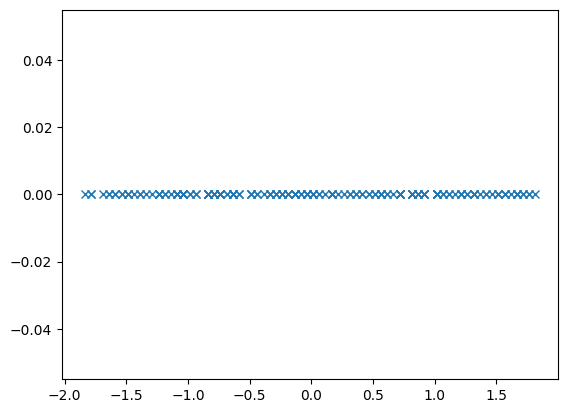

In [281]:
df = pd.read_csv("sub_indices/digital_governance_participation_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "E-Participation_Index", "E-Participation Index")

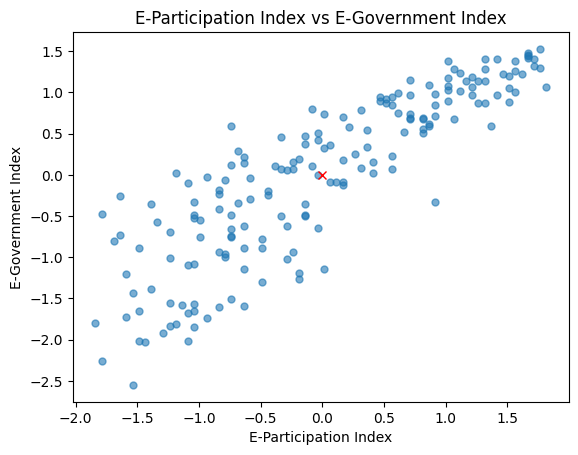

In [282]:
plot_indicator_pairs(df, "E-Participation_Index", "E-Government_Index", "E-Participation Index", "E-Government Index")
plt.show()

Slope: 0.8652676725141415, Intercept: -3.8506784374454005e-17, R-squared: 0.74868814509804, P-value: 1.14641801989368e-54


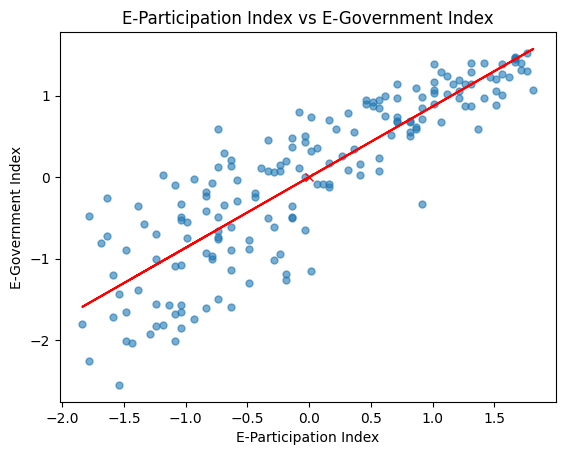

In [283]:
calculate_details(df, "E-Participation_Index", "E-Government_Index", "E-Participation Index", "E-Government Index")
plt.show()

[[-2.45126500e+00 -4.17263953e-01]
 [ 1.05815375e+00 -9.41662157e-02]
 [-1.33870243e+00  9.78573099e-01]
 [ 2.39374252e-01  7.69635864e-03]
 [-1.49893714e+00 -3.14850624e-02]
 [-4.42060142e-01  3.88024351e-01]
 [ 9.95946028e-01  3.39356410e-01]
 [ 1.51340085e+00 -2.76286694e-01]
 [ 1.92294248e+00  6.24363098e-02]
 [ 1.54477771e+00  1.09183260e-01]
 [ 3.29281978e-01  3.80361643e-01]
 [-2.81268418e-01  6.90453316e-01]
 [ 1.90572261e+00 -1.67239417e-01]
 [ 3.11658574e-01 -2.74112423e-01]
 [-3.52208153e-01  5.48694961e-01]
 [ 2.76690367e-01  3.27770032e-01]
 [ 5.30854185e-01  5.11632154e-01]
 [-1.22932677e+00  1.67306692e-01]
 [-9.70442614e-01 -2.81995362e-01]
 [-2.57437791e-02  2.53358863e-02]
 [-1.57517503e-01  2.47655266e-01]
 [ 5.67932781e-02 -1.74884615e-01]
 [-7.19626620e-01  4.64550977e-01]
 [ 1.54262482e+00 -3.17881348e-01]
 [ 2.41073151e-01  4.33790057e-01]
 [ 9.63570453e-01  9.45249730e-02]
 [-1.90506485e+00 -4.37612766e-01]
 [-2.03916698e+00 -5.71714896e-01]
 [ 2.71619210e-02 -2

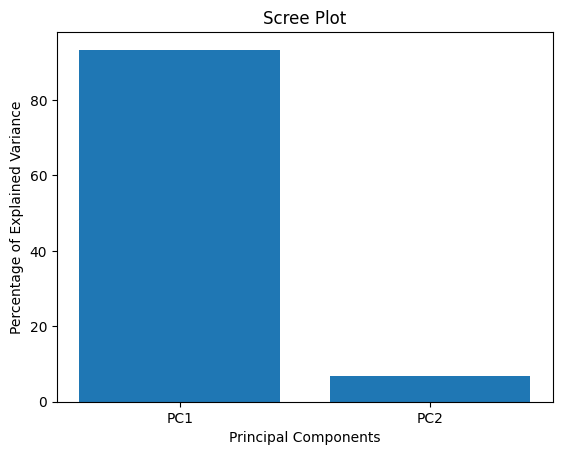

[0.93263384 0.06736616]
[0.93263384 1.        ]


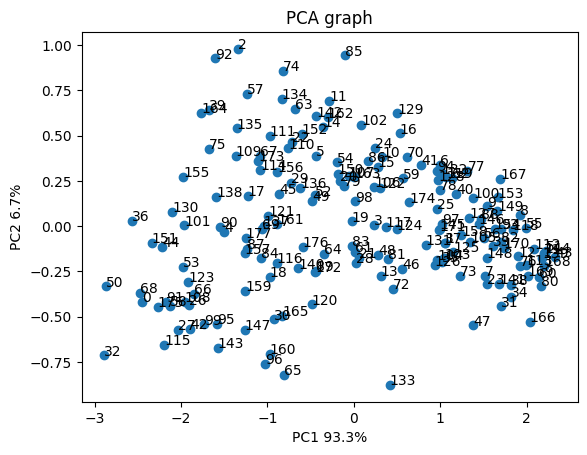


 Top contributors to PC1:
E-Participation_Index    0.707107
E-Government_Index       0.707107
dtype: float64

 Top contributors to PC2:
E-Government_Index       0.707107
E-Participation_Index    0.707107
dtype: float64


In [284]:
plot_pca(df)


<h2>Digital Trade Economy</h2>

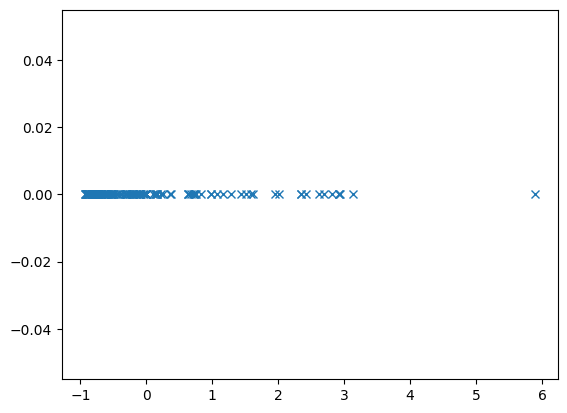

In [285]:
df = pd.read_csv("sub_indices/digital_trade_economy_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "ICT_Service_Exports", "ICT Service Exports")

Most of the data is between -1 and 1 with the majority of the rest of the data not too far from this range. Noteably there is one piece of data that is as far as 4 where the rest dont exceed 2 or -2.

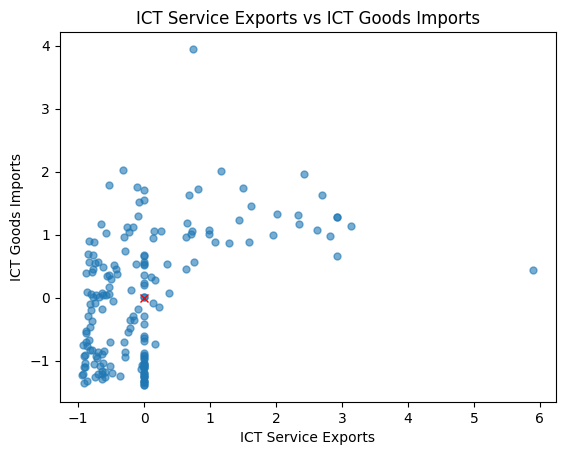

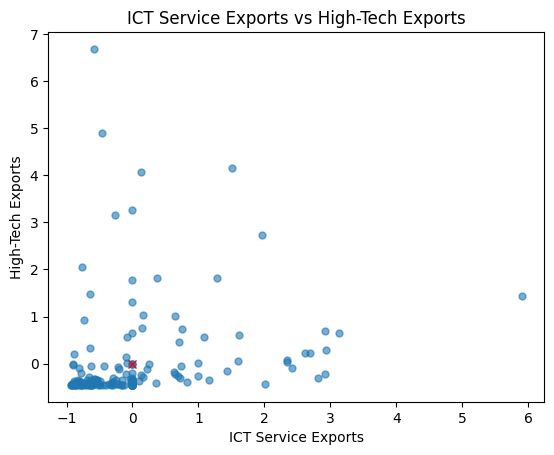

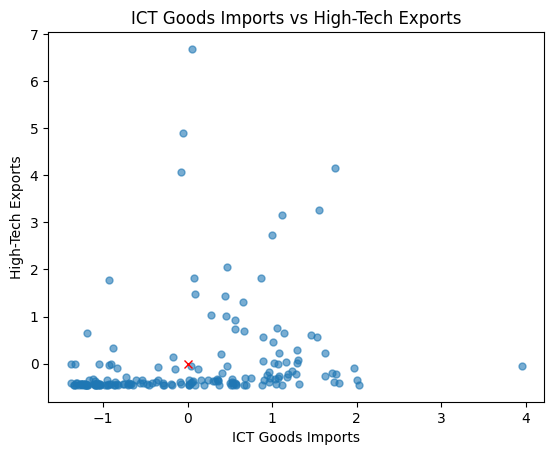

In [286]:
plot_indicator_pairs(df, "ICT_Service_Exports", "ICT_Goods_Imports", "ICT Service Exports", "ICT Goods Imports")
plt.show()
plot_indicator_pairs(df, "ICT_Service_Exports", "High-Tech_Exports", "ICT Service Exports", "High-Tech Exports")
plt.show()
plot_indicator_pairs(df, "ICT_Goods_Imports", "High-Tech_Exports", "ICT Goods Imports", "High-Tech Exports")

Slope: 0.4670256699938789, Intercept: 8.252254999148892e-17, R-squared: 0.21811297643323133, P-value: 4.9836735318557395e-11


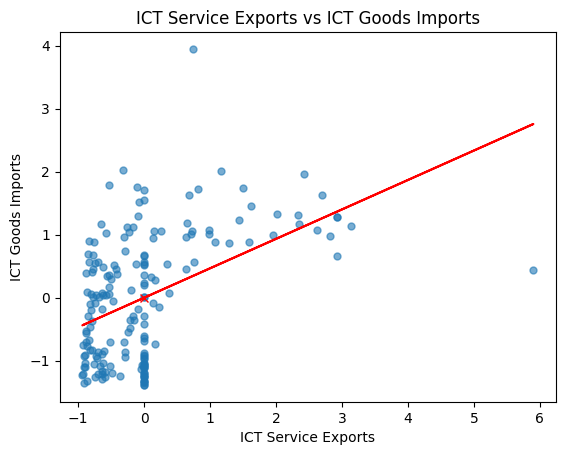

Slope: 0.21393514463492097, Intercept: 5.4862940781591386e-17, R-squared: 0.04576824610996454, P-value: 0.004138389592142458


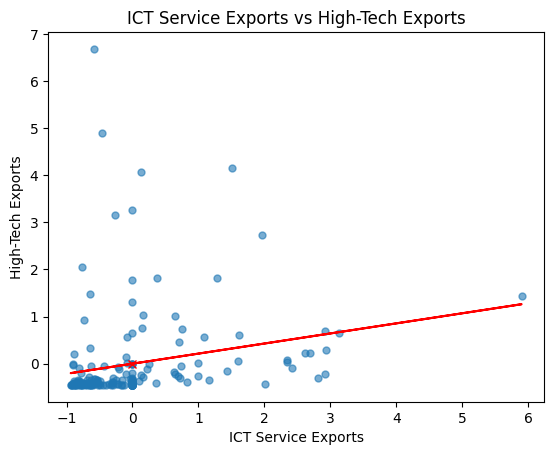

Slope: 0.23400413331036402, Intercept: 2.824187159737099e-17, R-squared: 0.05475793440633467, P-value: 0.0016678376924786679


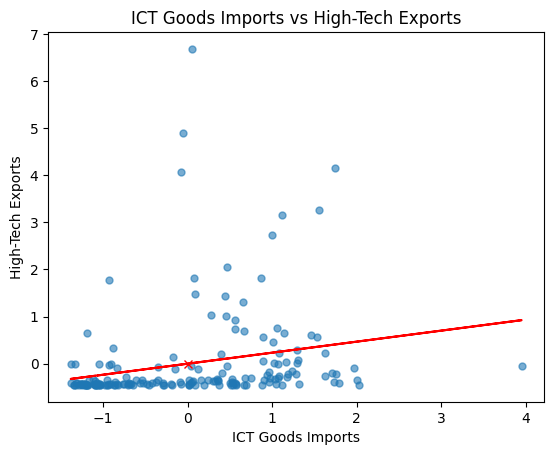

In [287]:
calculate_details(df, "ICT_Service_Exports", "ICT_Goods_Imports", "ICT Service Exports", "ICT Goods Imports")
plt.show()
calculate_details(df, "ICT_Service_Exports", "High-Tech_Exports", "ICT Service Exports", "High-Tech Exports")
plt.show()
calculate_details(df, "ICT_Goods_Imports", "High-Tech_Exports", "ICT Goods Imports", "High-Tech Exports")
plt.show()

[[-8.76896657e-01 -9.29023608e-02 -7.42362786e-01]
 [-2.61430007e-01 -3.25645465e-01  1.03667126e+00]
 [-2.16760777e-01 -3.65808101e-01  5.67149630e-01]
 [ 1.00986270e+00  9.82926898e-01  4.17806490e-01]
 [-1.46734188e+00  2.34382286e-01 -1.28591000e-01]
 [-5.45736603e-01 -1.37459432e-01 -4.22265559e-01]
 [ 8.86209308e-01 -8.73755441e-01  1.69709648e+00]
 [ 3.04931171e-01  9.21486555e-01  8.79601153e-01]
 [ 1.84362998e+00 -1.29901789e+00  6.39258460e-01]
 [ 2.82889567e+00 -1.19826477e+00 -7.20951930e-01]
 [-7.14568955e-01 -1.11707310e-01  4.77182856e-01]
 [-7.61521550e-01 -3.75186653e-02 -6.66227058e-01]
 [-1.09064049e-01 -2.88024330e-01  1.24139100e+00]
 [-6.10562205e-01 -2.08179801e-01 -4.45281041e-01]
 [ 2.98800592e-01 -4.60857284e-01  4.98739501e-01]
 [ 1.57391260e-01 -3.79920960e-01  7.47848846e-01]
 [ 2.54628364e+00 -1.58370460e+00 -1.11736324e+00]
 [-6.26692724e-01 -1.86939238e-01 -4.70389392e-01]
 [-8.78659234e-01 -8.59274957e-02 -7.47428830e-01]
 [ 2.13784916e-01  1.85659953e+

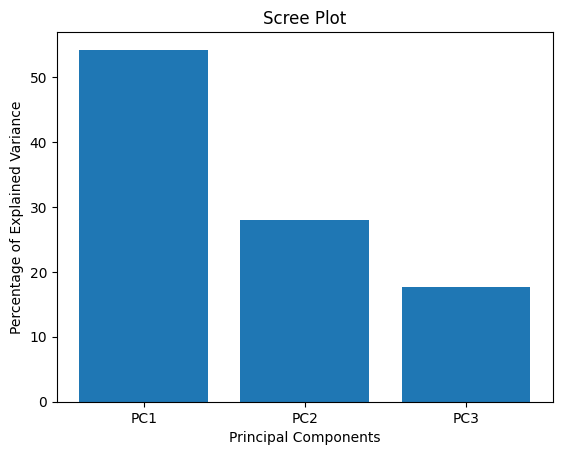

[0.54235466 0.28017357 0.17747177]
[0.54235466 0.82252823 1.        ]


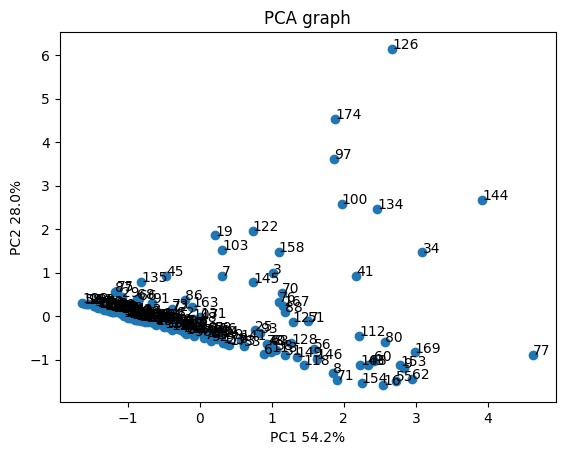


 Top contributors to PC1:
ICT_Goods_Imports      0.635246
ICT_Service_Exports    0.626974
High-Tech_Exports      0.450962
dtype: float64

 Top contributors to PC2:
High-Tech_Exports      0.891675
ICT_Service_Exports    0.347859
ICT_Goods_Imports      0.289672
dtype: float64

 Top contributors to PC3:
ICT_Goods_Imports      0.715928
ICT_Service_Exports    0.697064
High-Tech_Exports      0.039359
dtype: float64


In [288]:
plot_pca(df)

<h1>Education Human Capital</h1>

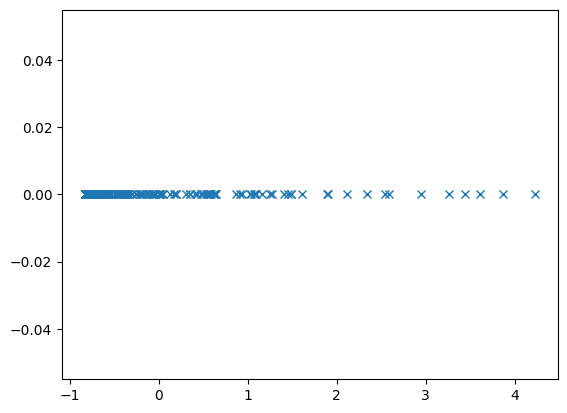

In [289]:
df = pd.read_csv("sub_indices/education_human_capital_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "Tertiary_Education_Enrollment", "Tertiary Education Enrollment")


As in previous subsets, the majority of the data is between -1 and 1 which a handful of the data being outside this range

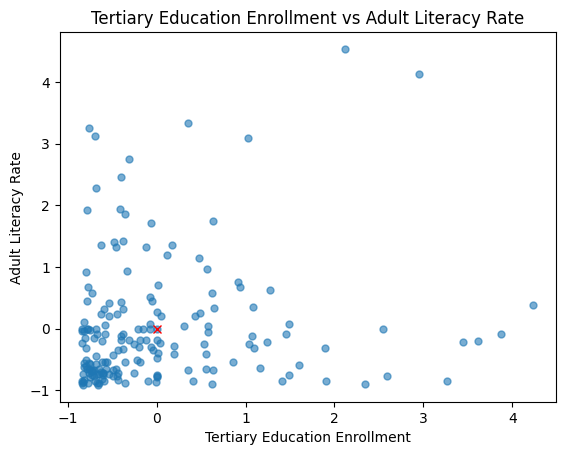

In [290]:
plot_indicator_pairs(df, "Tertiary_Education_Enrollment", "Adult_Literacy_Rate", "Tertiary Education Enrollment", "Adult Literacy Rate")
plt.show()

Adding Tertiary Education Enrollment causes the data to be distributed vertically. There is especially a major variance in the positive direction. The majority of the data is below 0 and above -1.

Slope: 0.13444508826673984, Intercept: 4.9603844716480364e-17, R-squared: 0.01807548175905147, P-value: 0.07358002730572315


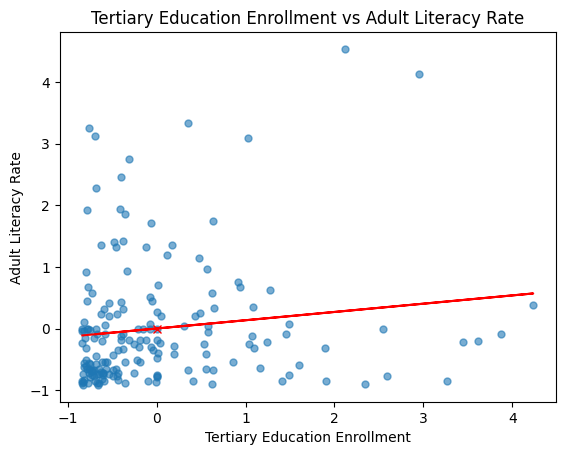

In [291]:
calculate_details(df,"Tertiary_Education_Enrollment", "Adult_Literacy_Rate", "Tertiary Education Enrollment", "Adult Literacy Rate")
plt.show()

[[-7.51246707e-01  4.27759833e-01]
 [-1.01390591e+00  8.86766494e-02]
 [-1.04838095e+00  2.30564145e-02]
 [ 2.31698415e-01 -9.90079823e-01]
 [ 2.91205748e+00  1.46214958e+00]
 [-1.20976756e+00 -3.07610189e-02]
 [ 1.46829017e-02  5.83307917e-01]
 [ 1.17254738e+00 -1.15624537e-01]
 [ 3.71055659e-01 -1.26783009e+00]
 [ 4.44420858e-01 -1.60057566e-01]
 [-9.39483658e-01 -8.65180133e-02]
 [-5.88729049e-01  5.88729049e-01]
 [-6.81758448e-01  4.53863687e-01]
 [-5.95675330e-01  5.48848572e-01]
 [-1.94031053e-01 -1.07968039e+00]
 [ 1.05902220e+00  1.56423292e+00]
 [ 6.89812364e-01 -2.21957561e-01]
 [-6.13857018e-01  5.65149521e-01]
 [-8.16075923e-01 -1.31908928e-01]
 [-1.19511847e+00 -1.86917008e-02]
 [-5.11759250e-01 -2.47292156e-01]
 [-1.46623132e-01  4.76048833e-01]
 [-9.18995624e-01  1.99587716e-01]
 [ 1.78255396e-01  1.12846175e-01]
 [-5.52466480e-01  5.12378956e-01]
 [ 9.27366250e-01  7.55828984e-01]
 [-8.05487313e-02  6.73080207e-01]
 [-9.36103889e-01  1.17689624e-01]
 [-1.08196614e+00 -3

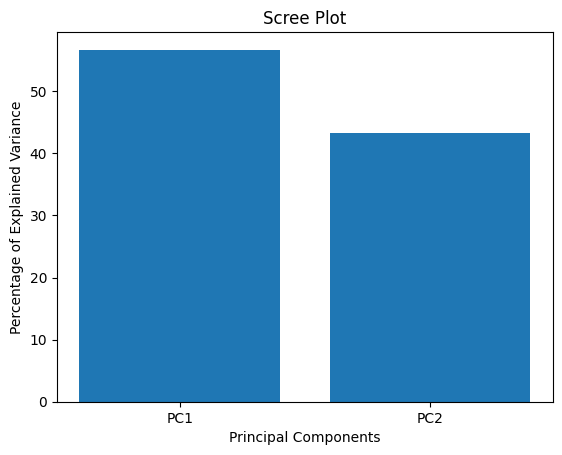

[0.56722254 0.43277746]
[0.56722254 1.        ]


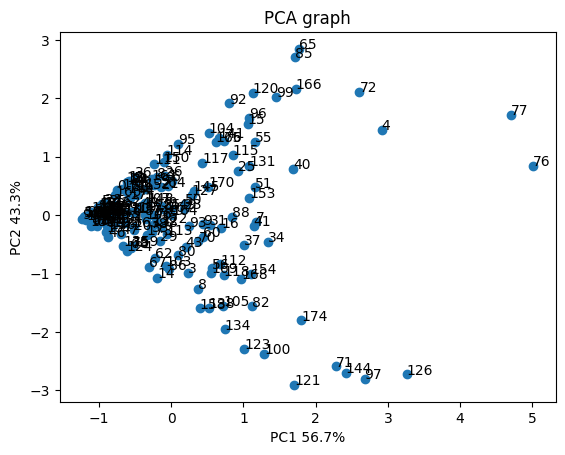


 Top contributors to PC1:
Adult_Literacy_Rate              0.707107
Tertiary_Education_Enrollment    0.707107
dtype: float64

 Top contributors to PC2:
Adult_Literacy_Rate              0.707107
Tertiary_Education_Enrollment    0.707107
dtype: float64


In [292]:
plot_pca(df)

In this dataset both indicators explain each other meaning they are both necessary for the sub index.

<h1>Infrastructure Security Standardised</h1>


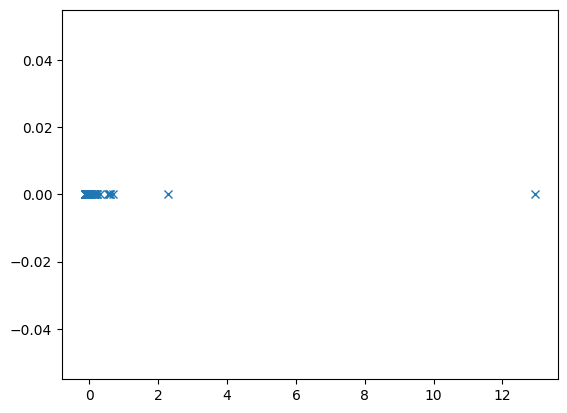

In [293]:
df = pd.read_csv("sub_indices/infrastructure_security_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "Secure_Internet_Servers_per_million", "Secure Internet Servers per million")

The data is quite spread out with a high concentration between 0 and 1

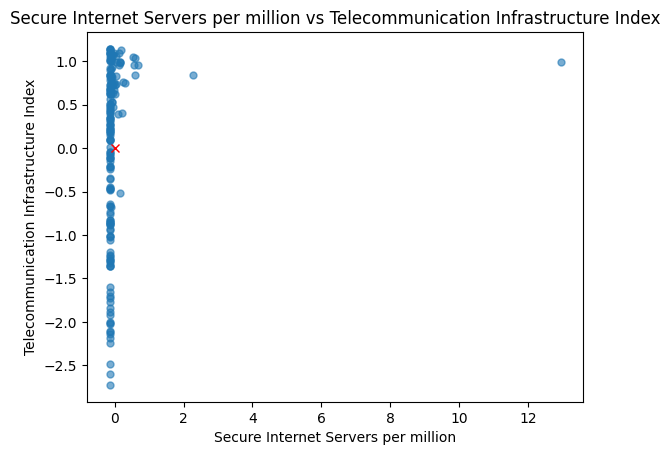

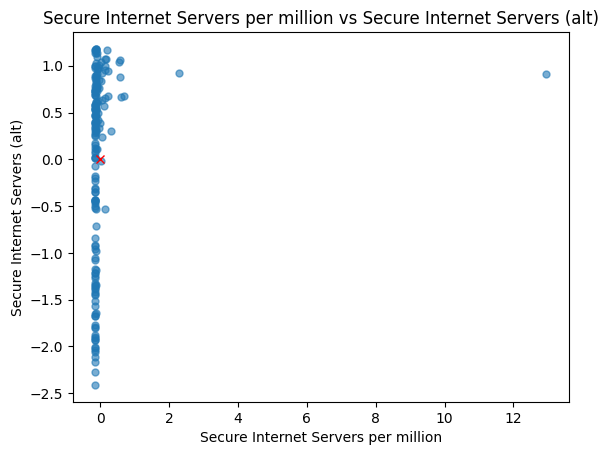

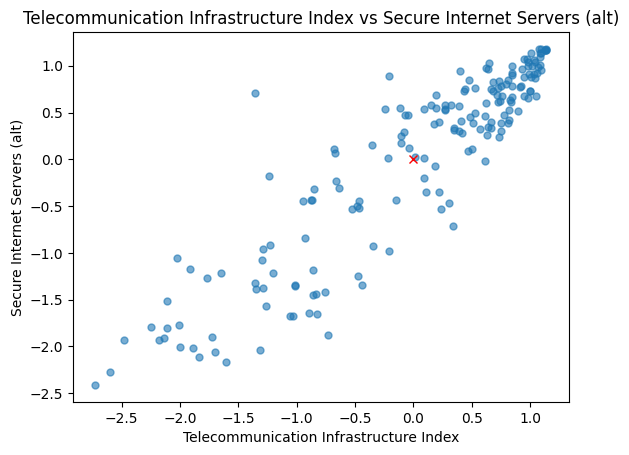

In [294]:
plot_indicator_pairs(df, "Secure_Internet_Servers_per_million", "Telecommunication_Infrastructure_Index", "Secure Internet Servers per million", "Telecommunication Infrastructure Index")
plt.show()
plot_indicator_pairs(df, "Secure_Internet_Servers_per_million", "Secure_Internet_Servers_alt", "Secure Internet Servers per million", "Secure Internet Servers (alt)")
plt.show()
plot_indicator_pairs(df, "Telecommunication_Infrastructure_Index", "Secure_Internet_Servers_alt", "Telecommunication Infrastructure Index", "Secure Internet Servers (alt)")
plt.show()


Adding the Telecommunication Infrastructure Index causes a major vertical shift in the scatter plot, showing a clear concentration near 1

Slope: 0.12984894713146308, Intercept: -4.897418038431289e-16, R-squared: 0.016860749071149487, P-value: 0.08407482193941775


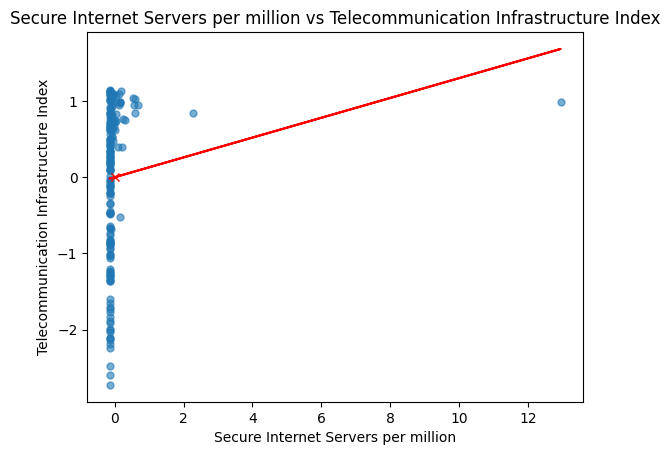

Slope: 0.12125501132822154, Intercept: 1.2670875556456265e-16, R-squared: 0.014702777772207128, P-value: 0.10689647293773494


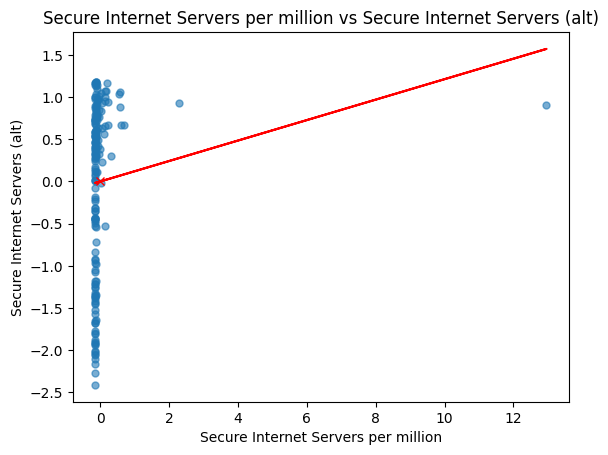

Slope: 0.9103036963579633, Intercept: 5.725986995159949e-16, R-squared: 0.828652819602971, P-value: 2.512176448693261e-69


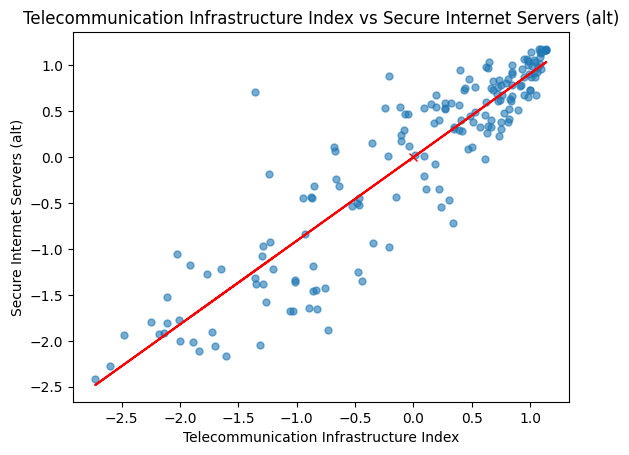

In [295]:
calculate_details(df, "Secure_Internet_Servers_per_million", "Telecommunication_Infrastructure_Index", "Secure Internet Servers per million", "Telecommunication Infrastructure Index")
plt.show()
calculate_details(df, "Secure_Internet_Servers_per_million", "Secure_Internet_Servers_alt", "Secure Internet Servers per million", "Secure Internet Servers (alt)")
plt.show()
calculate_details(df, "Telecommunication_Infrastructure_Index", "Secure_Internet_Servers_alt", "Telecommunication Infrastructure Index", "Secure Internet Servers (alt)")
plt.show()

All values like the slope and the p-value are strong indicators that these have a very strong linear relationship and are very accurate indicators

[[-2.73874044e+00  3.71017134e-01  9.09408214e-02]
 [ 5.25199059e-01 -2.44647673e-01 -1.77649344e-01]
 [ 4.59927864e-01 -2.30199174e-01  9.61997002e-02]
 [ 1.25478536e+00 -3.81917464e-01 -1.10304657e-01]
 [-1.58957943e+00  1.52521017e-01 -2.27216502e-01]
 [ 4.28551952e-01 -2.25747062e-01  2.60343801e-02]
 [ 8.80708814e-01 -2.59506876e-01 -1.60669603e-01]
 [ 7.19051218e-01 -2.78548913e-01  1.89762863e-01]
 [ 1.42426936e+00 -1.45036341e-01 -8.26141771e-02]
 [ 1.41166342e+00 -3.28647880e-01  6.11408466e-02]
 [ 8.06320617e-01 -2.97331814e-01 -2.15530886e-01]
 [ 1.08322645e+00 -3.50324442e-01 -2.52000259e-01]
 [ 1.55287769e+00 -4.36041244e-01 -5.97786982e-02]
 [-8.48997894e-01  3.22861540e-02  5.40201318e-01]
 [ 4.07694365e-01 -2.22834272e-01 -1.26935195e-01]
 [ 1.13372811e+00 -3.35546042e-01 -2.38230019e-02]
 [ 1.10542243e+00 -2.70854401e-01 -2.34439115e-01]
 [-4.17515300e-01 -3.52449174e-02 -5.56241158e-01]
 [-1.63573928e+00  1.65394041e-01  4.17481648e-01]
 [ 7.80851184e-01 -2.93468466e-

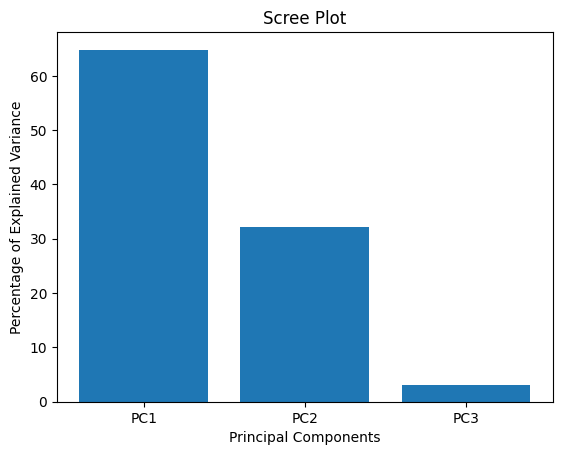

[0.64790381 0.3222112  0.02988498]
[0.64790381 0.97011502 1.        ]


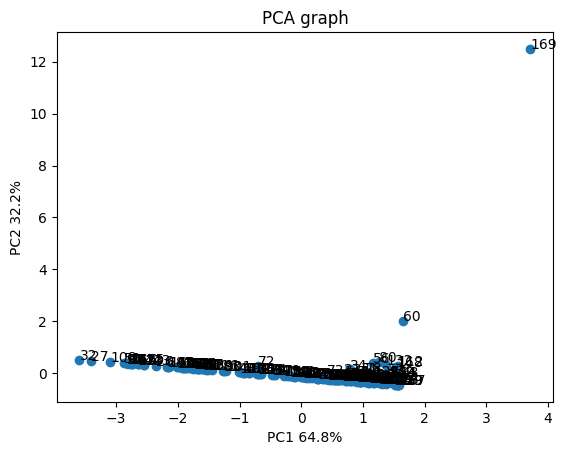


 Top contributors to PC1:
Telecommunication_Infrastructure_Index    0.695342
Secure_Internet_Servers_alt               0.694485
Secure_Internet_Servers_per_million       0.184907
dtype: float64

 Top contributors to PC2:
Secure_Internet_Servers_per_million       0.982732
Secure_Internet_Servers_alt               0.135564
Telecommunication_Infrastructure_Index    0.125934
dtype: float64

 Top contributors to PC3:
Telecommunication_Infrastructure_Index    0.707559
Secure_Internet_Servers_alt               0.706621
Secure_Internet_Servers_per_million       0.006805
dtype: float64


In [296]:
plot_pca(df)

Both indicators have equal importance although in the PCA analysis PC1 clearly describes the majority of the data

<h1>Innovation R&D</h1>


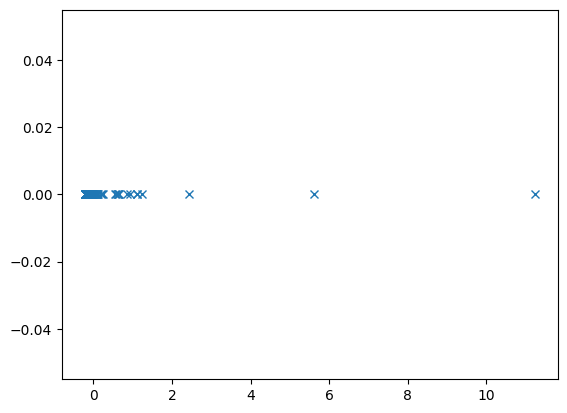

In [297]:
df = pd.read_csv("sub_indices/innovation_rd_standardised.csv")
df = df.drop(columns=["Country"])

plot_single_indicator(df, "R&D_Expenditure", "R&D Expenditure")

The majority of the data is clustered in the -1 to 1 region with only a handful outliars

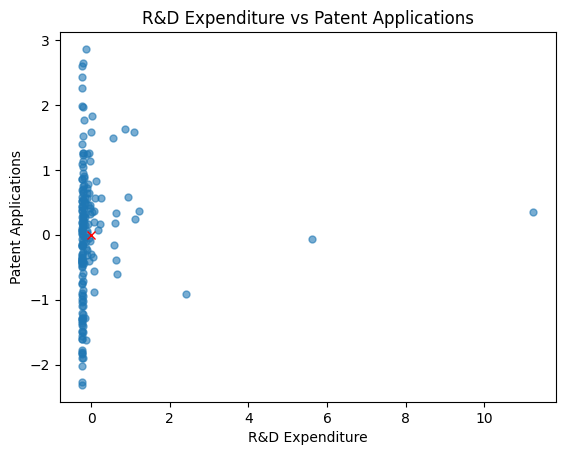

In [298]:
plot_indicator_pairs(df, "R&D_Expenditure", "Patent_Applications", "R&D Expenditure", "Patent Applications")
plt.show()

Adding Patent Applications essensially spreads the data out in both directions vertially with the majority of the data still staying between 1 and -1

Slope: 0.0565477122083683, Intercept: 3.7724712749180516e-16, R-squared: 0.0031976437560004432, P-value: 0.45342003944220166


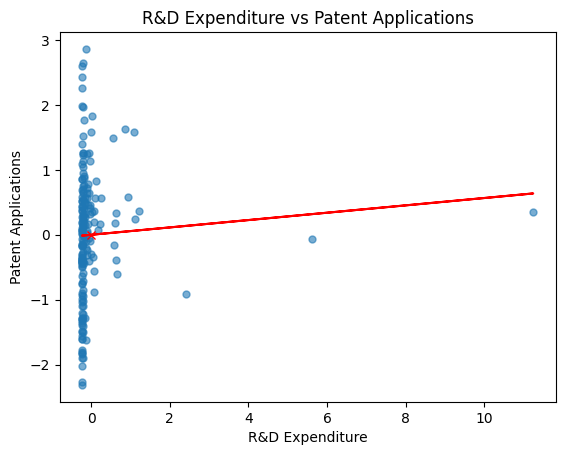

In [299]:
calculate_details(df, "R&D_Expenditure", "Patent_Applications", "R&D Expenditure", "Patent Applications")
plt.show()

The relationship between R&D Expenditure and Patent Applications is clearly possitive but too strong. The slope is quite shallow adn the R-value is not that high but still positive

[[-1.29252263e+00  9.74111749e-01]
 [-4.53856671e-01  1.36698795e-01]
 [-1.58634064e-01 -2.54945777e-02]
 [ 4.42886126e-01 -7.64178382e-01]
 [-1.07427527e+00  7.53621971e-01]
 [ 1.56146640e+00 -1.88280524e+00]
 [ 3.25301125e-01 -4.82067097e-01]
 [ 3.07590216e-01 -6.17224454e-01]
 [ 2.91879060e-01  5.11563460e-01]
 [ 1.93259516e-01 -2.52260270e-01]
 [-2.63548273e-01 -3.67106225e-02]
 [-4.42609618e-01  1.21464509e-01]
 [ 5.14335894e-01 -8.23675838e-01]
 [-2.42702973e-01  4.86354959e-02]
 [-1.11212164e-01 -2.08946609e-01]
 [ 7.59955015e-02 -3.70029084e-01]
 [-2.16214950e-01  2.12736839e-01]
 [-1.10247375e+00  7.81328461e-01]
 [-2.27624573e-01 -8.63718978e-02]
 [-5.15655505e-01  1.96271646e-01]
 [-4.19086109e-01  1.01015200e-01]
 [-4.10631964e-02 -2.61636896e-01]
 [ 9.14538162e-01 -1.22891378e+00]
 [ 1.69487076e-01  7.19274731e-01]
 [-4.93936481e-02 -2.64590365e-01]
 [-1.64451887e-02 -2.18643635e-01]
 [-1.72944893e-01 -1.41095993e-01]
 [-1.26527145e+00  9.44311220e-01]
 [-4.28519673e-01  1

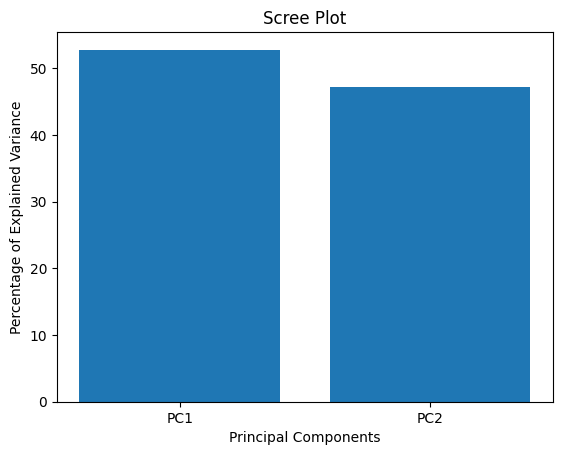

[0.52827386 0.47172614]
[0.52827386 1.        ]


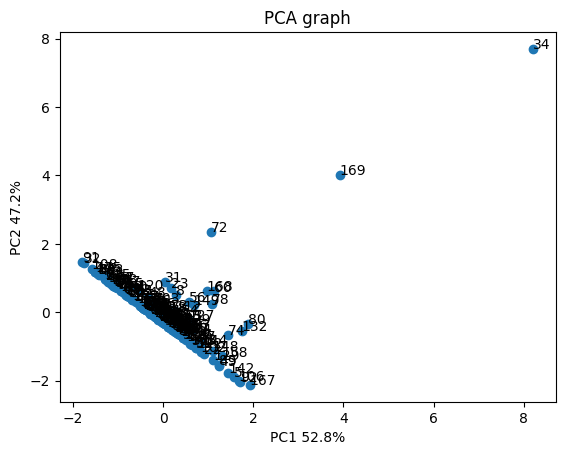


 Top contributors to PC1:
Patent_Applications    0.707107
R&D_Expenditure        0.707107
dtype: float64

 Top contributors to PC2:
R&D_Expenditure        0.707107
Patent_Applications    0.707107
dtype: float64


In [300]:
plot_pca(df)